In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [72]:
df = pd.read_csv("ai_resume_screening.csv")
df.head()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,Bachelors,7,234,158,No
1,3,59.1,Masters,5,502,77,No
2,12,100.0,Masters,12,753,381,Yes
3,14,66.8,High School,8,529,407,Yes
4,10,99.6,Bachelors,10,754,331,Yes


In [73]:
df.shape[0]

30000

In [74]:
df = df.head(1000)

In [75]:
df.shape[0]

1000

In [76]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   years_experience    1000 non-null   int64  
 1   skills_match_score  1000 non-null   float64
 2   education_level     1000 non-null   str    
 3   project_count       1000 non-null   int64  
 4   resume_length       1000 non-null   int64  
 5   github_activity     1000 non-null   int64  
 6   shortlisted         1000 non-null   str    
dtypes: float64(1), int64(4), str(2)
memory usage: 54.8 KB


In [77]:
df.describe()

,years_experience,skills_match_score,project_count,resume_length,github_activity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,7.570000,73.549800,10.554000,573.453000,323.610000
std,4.666785,16.691088,4.577121,183.733083,156.789467
min,0.000000,20.600000,0.000000,150.000000,0.000000
25%,3.000000,62.300000,7.000000,434.750000,205.000000
50%,8.000000,74.100000,10.000000,578.000000,320.000000
75%,12.000000,85.725000,13.000000,714.250000,442.250000
max,15.000000,100.000000,25.000000,900.000000,745.000000


In [78]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
num_cols.columns

Index(['years_experience', 'skills_match_score', 'project_count',
       'resume_length', 'github_activity'],
      dtype='str')

In [79]:
num_cols

,years_experience,skills_match_score,project_count,resume_length,github_activity
0,6,84.7,7,234,158
1,3,59.1,5,502,77
2,12,100.0,12,753,381
3,14,66.8,8,529,407
4,10,99.6,10,754,331
...,...,...,...,...,...
995,4,59.5,4,394,155
996,8,66.1,6,408,197
997,3,64.8,8,327,257
998,15,87.8,25,606,736


years_experience


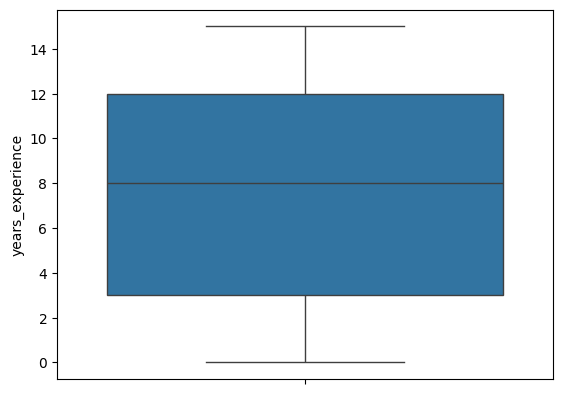

skills_match_score


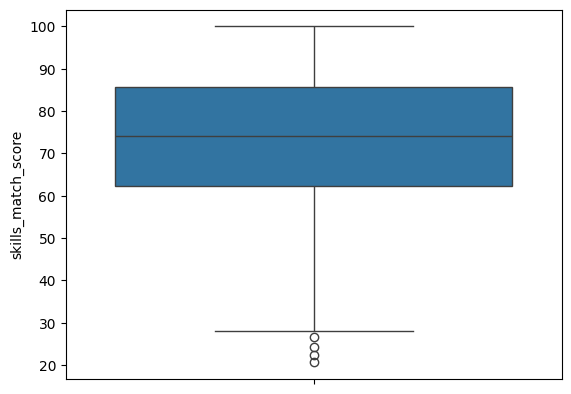

project_count


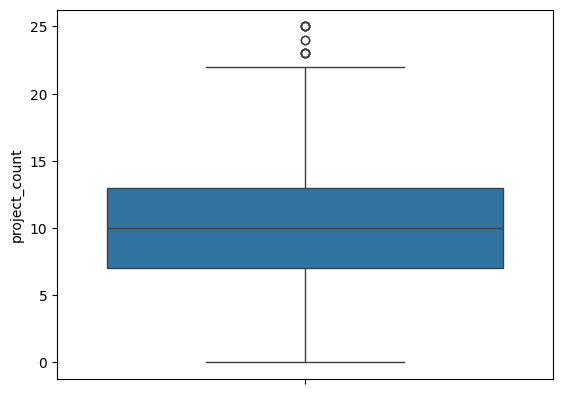

resume_length


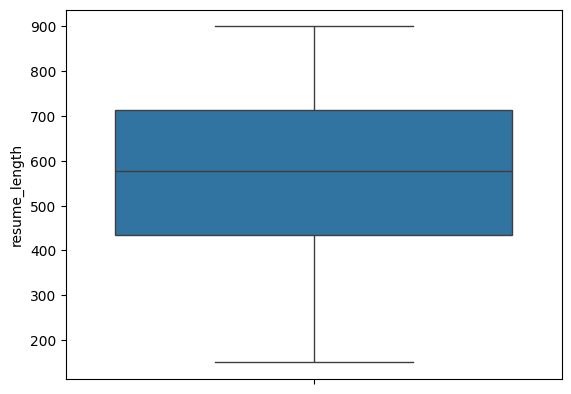

github_activity


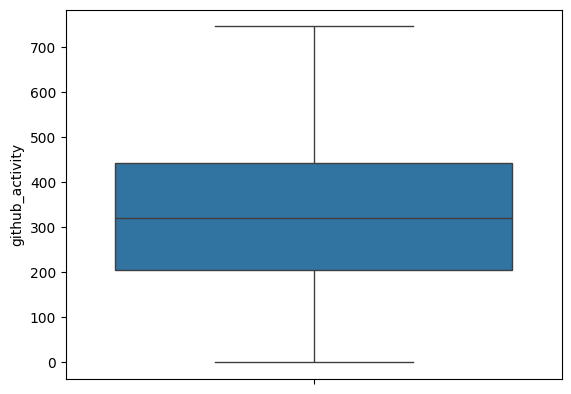

In [80]:
for i in num_cols:
    print(f"{i}")
    sns.boxplot(df[i])
    plt.show()

In [81]:
def replace_outliers(d):
    for i in d.columns:
        q1 = d[i].quantile(0.25)
        q3 = d[i].quantile(0.75)
        iqr = q3 - q1
        lw = q1 - 1.5 * iqr
        uw = q3 + 1.5 * iqr
        d[i] = d[i].apply(lambda x : min(max(x, lw), uw))
    return d

In [82]:
num_cols = replace_outliers(num_cols)

In [83]:
df

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,Bachelors,7,234,158,No
1,3,59.1,Masters,5,502,77,No
2,12,100.0,Masters,12,753,381,Yes
3,14,66.8,High School,8,529,407,Yes
4,10,99.6,Bachelors,10,754,331,Yes
...,...,...,...,...,...,...,...
995,4,59.5,High School,4,394,155,No
996,8,66.1,Masters,6,408,197,No
997,3,64.8,Masters,8,327,257,No
998,15,87.8,Masters,25,606,736,Yes


In [84]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

encoder = LabelEncoder()
df['education_level'] = encoder.fit_transform(df['education_level'])
df.head()

#Bachelor's = 0
#High School = 1
#Master's = 2

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,0,7,234,158,No
1,3,59.1,2,5,502,77,No
2,12,100.0,2,12,753,381,Yes
3,14,66.8,1,8,529,407,Yes
4,10,99.6,0,10,754,331,Yes


years_experience


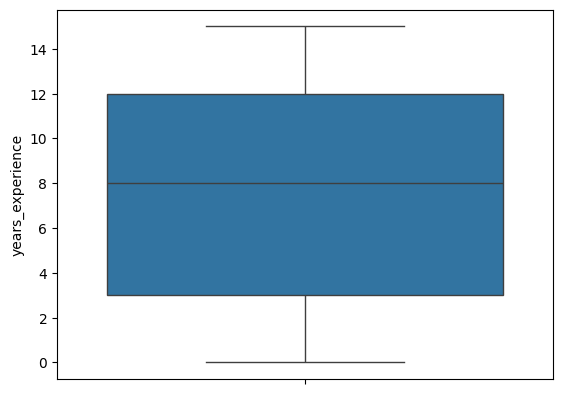

skills_match_score


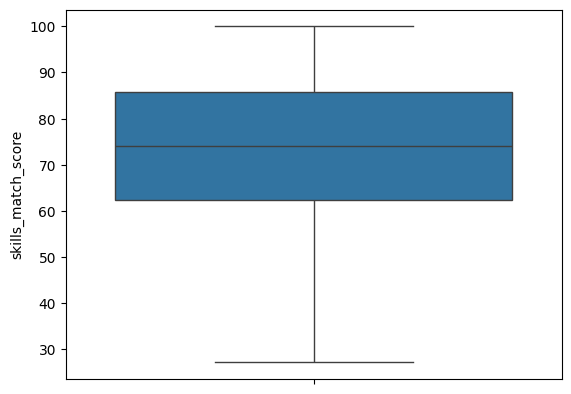

project_count


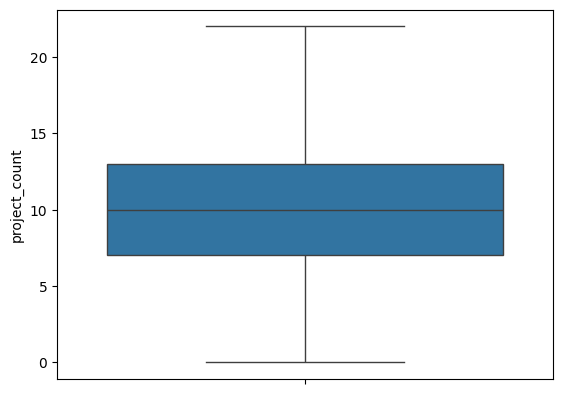

resume_length


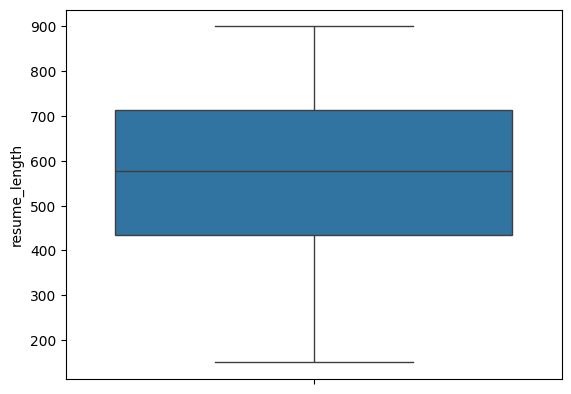

github_activity


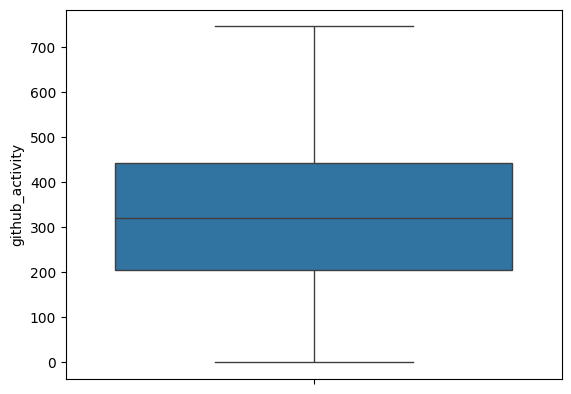

In [85]:
for i in num_cols:
    print(f"{i}")
    sns.boxplot(num_cols[i])
    plt.show()

In [86]:
num_cols = num_cols.copy()

num_cols["github_activity"] = np.log1p(num_cols["github_activity"])
num_cols["project_count"] = np.log1p(num_cols["project_count"])
num_cols["resume_length"] = np.sqrt(num_cols["resume_length"])

In [87]:
df[num_cols.columns] = num_cols

In [88]:
df

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity,shortlisted
0,6,84.7,0,2.079442,15.297059,5.068904,No
1,3,59.1,2,1.791759,22.405357,4.356709,No
2,12,100.0,2,2.564949,27.440845,5.945421,Yes
3,14,66.8,1,2.197225,23.000000,6.011267,Yes
4,10,99.6,0,2.397895,27.459060,5.805135,Yes
...,...,...,...,...,...,...,...
995,4,59.5,1,1.609438,19.849433,5.049856,No
996,8,66.1,2,1.945910,20.199010,5.288267,No
997,3,64.8,2,2.197225,18.083141,5.552960,No
998,15,87.8,2,3.135494,24.617067,6.602588,Yes


In [89]:
target = df['shortlisted']
features = df.drop('shortlisted', axis=1)

In [90]:
features.head()

,years_experience,skills_match_score,education_level,project_count,resume_length,github_activity
0,6,84.7,0,2.079442,15.297059,5.068904
1,3,59.1,2,1.791759,22.405357,4.356709
2,12,100.0,2,2.564949,27.440845,5.945421
3,14,66.8,1,2.197225,23.000000,6.011267
4,10,99.6,0,2.397895,27.459060,5.805135


In [91]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=1)

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [93]:
def mymodel(model):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    labels = model.classes_
    # checking for overfit and underfit
    print(f'Training Score : {model.score(x_train, y_train)}')
    print(f'Testing Score : {model.score(x_test, y_test)}')
    # evaluation metrics
    c = pd.DataFrame(confusion_matrix(y_test, y_pred),
                     index = labels,
                     columns = labels)
    print(f'Confusion Matrix : \n{c}')
    print(f'Classification Report : \n{classification_report(y_test, y_pred)}')
    return model

In [94]:
dt = mymodel(DecisionTreeClassifier())

Training Score : 1.0
Testing Score : 0.8
Confusion Matrix : 
     No  Yes
No   38   23
Yes  17  122
Classification Report : 
              precision    recall  f1-score   support

          No       0.69      0.62      0.66        61
         Yes       0.84      0.88      0.86       139

    accuracy                           0.80       200
   macro avg       0.77      0.75      0.76       200
weighted avg       0.80      0.80      0.80       200



In [95]:
dt_pruned = DecisionTreeClassifier(
    criterion="gini",
    max_depth=5,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=1
)

dt_pruned_model = mymodel(dt_pruned)


Training Score : 0.9375
Testing Score : 0.835
Confusion Matrix : 
     No  Yes
No   40   21
Yes  12  127
Classification Report : 
              precision    recall  f1-score   support

          No       0.77      0.66      0.71        61
         Yes       0.86      0.91      0.89       139

    accuracy                           0.83       200
   macro avg       0.81      0.78      0.80       200
weighted avg       0.83      0.83      0.83       200



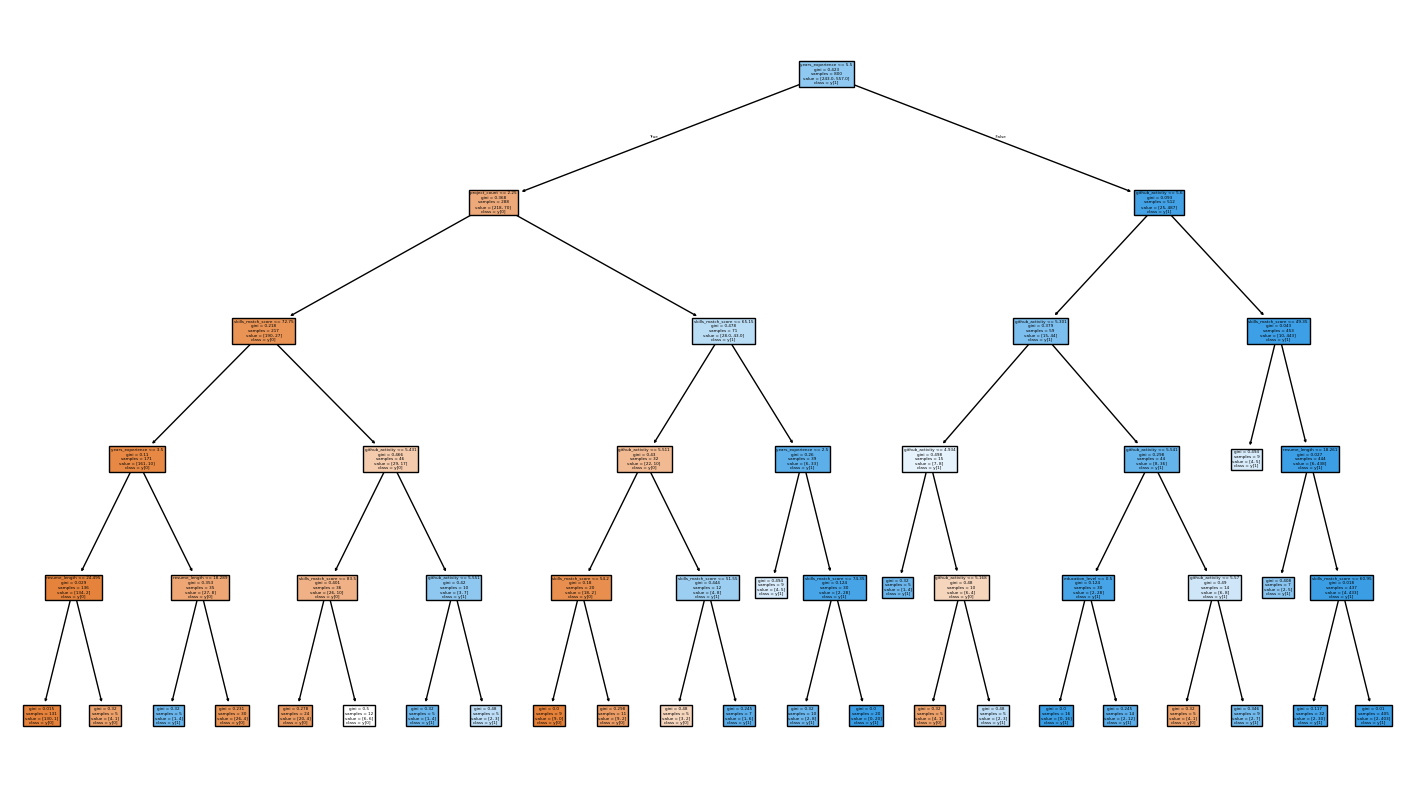

In [96]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(18,10))
tree.plot_tree(
    dt_pruned_model,
    feature_names=x_train.columns,
    class_names=True,
    filled=True
)
plt.show()


In [97]:
final_model = dt_pruned
final_model

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",10
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",1
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current no

In [98]:
importance = pd.DataFrame({
    "Feature": x_train.columns,
    "Importance": final_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

importance

,Feature,Importance
0,years_experience,0.712477
3,project_count,0.093215
1,skills_match_score,0.091643
5,github_activity,0.081879
4,resume_length,0.019639
2,education_level,0.001147


In [99]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=1)
mymodel(rf)


Training Score : 1.0
Testing Score : 0.865
Confusion Matrix : 
     No  Yes
No   43   18
Yes   9  130
Classification Report : 
              precision    recall  f1-score   support

          No       0.83      0.70      0.76        61
         Yes       0.88      0.94      0.91       139

    accuracy                           0.86       200
   macro avg       0.85      0.82      0.83       200
weighted avg       0.86      0.86      0.86       200



,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [100]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(final_model, f)